In [ ]:
import pandas as pd
import numpy as np

## DATASET

In [ ]:
# Train
train = pd.read_csv('train_data.csv')
x_train = train['tweet']
y_train = train['class']

- Class $0$ -> hate speech
- Class $1$ -> offensive language
- Class $2$ -> neither

In [ ]:
train.loc[:20, ['tweet', 'class']]

,tweet,class
0,Can't get no money from me you silly hoe,1
1,That was almost 10 years ago. I gave ALL them ...,1
2,"RT @RakwonOGOD: Bitches tweeting ""last night &...",1
3,"That hoe out there, Fat Trel said it best.",1
4,Can Charlie Crist pull one over on Rick Scott?...,2
5,RT @Realistt__: &#128525; &#8220;@Squirtology:...,1
6,My problem is caring about bitches &amp; noggas,1
7,All da white folk off twitter yet? Da colored ...,2
8,&#128514;&#128514;&#128514; played that nigga ...,1
9,RT @FlowDaddy24: @_RinkO0 @d_brad80 @0biwankob...,1


In [ ]:
# Test
test = pd.read_csv('test_data.csv')
x_test = test['tweet']
y_test = test['class']

In [ ]:
# Val
val = pd.read_csv('val_data.csv')
x_val = val['tweet']
y_val = val['class']

### PREPROCESSING
Removing tags, removing emojis and special words, removing non-alphanumeric characters 

In [ ]:
import re
def f(s):
  return ''.join([(c if c.isalnum() else (' ' if c!='\'' else '')) for c in re.sub('((&|@).*?(;| ))', ' ', s.replace('\n', ' ').replace('\t', ' ').replace('RT', ' '))]).lower()

In [ ]:
# Train
x_train_p = x_train.map(f)
x_train_p

0                  cant get no money from me you silly hoe
1        that was almost 10 years ago  i gave all them ...
2           bitches tweeting  last night     like they ...
3               that hoe out there  fat trel said it best 
4        can charlie crist pull one over on rick scott ...
                               ...                        
17343    going hard bitch swear im on my job throw a qu...
17344        parent in phoenix says administrators made...
17345       aw yall some hoes hating on that girl that ...
17346    watch out  ned   crc  worldcup2014  puravida h...
17347    jk  im going to be a pussy about it  i dont wa...
Name: tweet, Length: 17348, dtype: object

In [ ]:
x_train

0                 Can't get no money from me you silly hoe
1        That was almost 10 years ago. I gave ALL them ...
2        RT @RakwonOGOD: Bitches tweeting "last night &...
3               That hoe out there, Fat Trel said it best.
4        Can Charlie Crist pull one over on Rick Scott?...
                               ...                        
17343    Going hard bitch swear I'm on my job throw a q...
17344    RT @AmPowerBlog: @velvethammer Parent in Phoen...
17345    RT @nostalgic_mike: Aw y'all some hoes hating ...
17346    Watch out #ned! #crc #worldcup2014 #puravida h...
17347    Jk. I'm going to be a pussy about it. I don't ...
Name: tweet, Length: 17348, dtype: object

In [308]:
# Test
x_test_p = x_test.map(f)

In [309]:
# Val
x_val_p = x_val.map(f)

### Keep only the $500$ most frequent words
The count of the frequences is done with respect to the training set

In [ ]:
n_words_restr = 500

In [ ]:
from collections import Counter

In [ ]:
# Each training instance is a list of words
x_train_words = x_train_p.map(lambda s: [w for w in s.split(' ') if w!=''])
x_train_words

0        [cant, get, no, money, from, me, you, silly, hoe]
1        [that, was, almost, 10, years, ago, i, gave, a...
2        [bitches, tweeting, last, night, like, they, d...
3        [that, hoe, out, there, fat, trel, said, it, b...
4        [can, charlie, crist, pull, one, over, on, ric...
                               ...                        
17343    [going, hard, bitch, swear, im, on, my, job, t...
17344    [parent, in, phoenix, says, administrators, ma...
17345    [aw, yall, some, hoes, hating, on, that, girl,...
17346    [watch, out, ned, crc, worldcup2014, puravida,...
17347    [jk, im, going, to, be, a, pussy, about, it, i...
Name: tweet, Length: 17348, dtype: object

In [ ]:
# Single list containing all the words, possibly repeated, in the train set.
# Basically, it is the train set squized into a single list.
train_list = []
for l in x_train_words:
  train_list += set(l)
print(train_list[:20])

['me', 'money', 'from', 'no', 'get', 'you', 'silly', 'hoe', 'cant', 'was', 'almost', 'i', 'that', '10', 'stolen', 'all', 'them', 'bitches', 'away', 'gave']


In [ ]:
# Set containing all the different possible words in the training set
words = set([])
for l in x_train_words:
  words.update(set(l))
print(words)

{'scouts', '90', 'oomfs', 'itsy', 'iphones', 'deeper', 'laying', 'bosh', 'macktown', 'thingys', '3gzupfumev', 'decipher', 'itstoofuckingeasy', 'communists', 'pious', '56jkqioepe', 'blinked', 'comes', 'uggs', 'path', '3njzfytc1r', 'nrmc483m', 'staying', 'riders', 'ekfovvcwht', 'bayg', 'interlagos', 'friendship', 'formally', 'nametags', 'tweety', 'swaggin', 'avengers', 'ooooow', 'tbsd5jbjzx', 'democracy', 'emma', 'goproud', 'til', 'teuqy9hf', 'smells', 'throats', 'acut5et3tu', 'mommas', 'erased', 'easter420', 'built', 'snails', 'smoothly', 'wise', 'forums', 'mrs', 'shane', 'boooooi', 'dateing', 'scholen', 'inspect', 'toddler', 'kenneth', 'creampied', 'masterchefjunior', 'judgment', 'spunk', 'loosely', 'installment', 'helps', 'badcombinations', 'of09piyl8b', 'mantle', 'lotto', 'semi', 'cocktail', 'time', 'dirtylove', 'backpage', 'kyn7izfw4i', 'base', 'unloyal', 'leiacatherinexx', 'femininity', 'headphones', 'putins', 'houstons', 'tld', 'bod', 'comebacktoreality', 'kaboom', 'lockdown', '1y

In [ ]:
# From set to list
words_list = list(words)

In [ ]:
# List containing the count of each word in the training set
counter = Counter(train_list)
counts = [counter[w] for w in words_list]

In [ ]:
# Restricting to only the first 500 most frequent words
words_list_restr = [words_list[i] for i in np.argsort(counts)[::-1][:n_words_restr]]
print(words_list_restr)

['bitch', 'a', 'i', 'the', 'you', 'to', 'and', 'that', 'my', 't', 'bitches', 'co', 'in', 'http', 'is', 'like', 'me', 'on', 'of', 'hoes', 'be', 'pussy', 'this', 'for', 'im', 'hoe', 'it', 'with', 'dont', 'all', 'but', 'up', 'ass', 'just', 'your', 'if', 'get', 'so', 'fuck', 'these', 'when', 'got', 'no', 'they', 'shit', 'not', 'nigga', 'aint', 'trash', 'out', 'are', 'lol', 'was', 'at', 'u', 'have', 'she', 'her', 'its', 'about', 'some', 'what', 'he', 'know', 'do', 'can', 'niggas', 'one', 'how', 'we', 'them', 'love', 'cant', 'fucking', 'go', 'who', 'or', 'thats', 'yall', 'from', 'now', 'want', 'yo', 'as', 'why', 'then', 'bad', 'too', 'youre', 'his', 'man', 'good', 'make', 'off', 'an', 'back', 'say', 'still', 'see', 'only', 'time', 'look', 'faggot', 'never', 'need', 'ya', 'think', 'hate', 'girl', 'will', 'people', 'really', 'being', 'even', 'right', 'real', 'white', 'bird', 'would', 'lmao', 'day', 'let', 'said', 'wanna', 'here', 'dick', 'down', 'by', 'little', 'had', 'more', 'their', 'over', 

In [ ]:
# Set of all different possible words under consideration.
# We are updating the previously computed set, keeping only the 500 most frequent words
words = set(words_list_restr)

In [ ]:
# Number of total possible different words
n_words= len(words)
n_words

500

In [ ]:
# Each instance is a list of words
x_test_words = x_test_p.map(lambda s: [w for w in s.split(' ') if w!=''])
x_val_words = x_val_p.map(lambda s: [w for w in s.split(' ') if w!=''])

In [ ]:
# Keeping only the 500 most frequent words
x_train_words = x_train_words.map(lambda l: [w for w in l if w in words])
x_test_words = x_test_words.map(lambda l: [w for w in l if w in words])
x_val_words = x_val_words.map(lambda l: [w for w in l if w in words])

In [ ]:
x_train_words.shape

(17348,)

## BY HAND VECTORIZATION
It is done with respect to the train set: `n_words` and `words` are computed on the train set

In [ ]:
# Dictionary, which maps words into the corresponding integers (i.e. indeces) 
word2index = dict((c, i) for i, c in enumerate(words))

# Dictionary, which maps integers/indeces into the corresponding words 
index2word = dict((i, c) for i, c in enumerate(words))

## BAG OF WORDS
It is done with respect to the train set: `n_words` and `words` are computed on the train set

In [ ]:
x_train.shape[0]

17348

In [ ]:
# One-hot encoding the train set

x_train_oneHot = np.zeros((x_train.shape[0], n_words))

for i,l in enumerate(x_train_words):
  for w in l:
    try:
      x_train_oneHot[i, word2index[w]] = 1.0
    except KeyError:
      misses_number += 1

x_train_oneHot.shape

Misses: 0


(17348, 500)

In [ ]:
# One-hot encoding the test set

x_test_oneHot = np.zeros((x_test.shape[0], n_words))

for i,l in enumerate(x_test_words):
  for w in l:
    try:
      x_test_oneHot[i, word2index[w]] = 1.0
    except KeyError:
      misses_number += 1

x_test_oneHot.shape

Misses: 0


(3717, 500)

In [ ]:
# One-hot encoding the val set

x_val_oneHot = np.zeros((x_val.shape[0], n_words))

for i,l in enumerate(x_val_words):
  for w in l:
    try:
      x_val_oneHot[i, word2index[w]] = 1.0
    except KeyError:
      misses_number += 1

x_val_oneHot.shape

Misses: 0


(3718, 500)

### MODEL
Simply Dense NN

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model

In [ ]:
xin = Input(shape=(n_words,))

x = Dense(units=64, activation='relu')(xin)

x = Dense(units=64, activation='relu')(x)

x = Dense(units=64, activation='relu')(x)

res = Dense(units=3)(x)  # No activation

model = Model(xin, res)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 40,579
Trainable params: 40,579
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train_oneHot, y_train, batch_size=128, epochs=15, validation_data=[x_val_oneHot, y_val])

Epoch 1/15
136/136 [==============================] - 1s 5ms/step - loss: 0.5284 - accuracy: 0.8139 - val_loss: 0.3420 - val_accuracy: 0.8798
Epoch 2/15
136/136 [==============================] - 1s 4ms/step - loss: 0.2956 - accuracy: 0.8946 - val_loss: 0.2984 - val_accuracy: 0.8889
Epoch 3/15
136/136 [==============================] - 0s 4ms/step - loss: 0.2468 - accuracy: 0.9113 - val_loss: 0.2995 - val_accuracy: 0.8913
Epoch 4/15
136/136 [==============================] - 0s 4ms/step - loss: 0.2209 - accuracy: 0.9207 - val_loss: 0.3213 - val_accuracy: 0.8838
Epoch 5/15
136/136 [==============================] - 1s 7ms/step - loss: 0.1975 - accuracy: 0.9283 - val_loss: 0.3303 - val_accuracy: 0.8808
Epoch 6/15
136/136 [==============================] - 1s 7ms/step - loss: 0.1711 - accuracy: 0.9391 - val_loss: 0.3405 - val_accuracy: 0.8792
Epoch 7/15
136/136 [==============================] - 1s 7ms/step - loss: 0.1439 - accuracy: 0.9496 - val_loss: 0.3761 - val_accuracy: 0.8814
Epoch 

In [ ]:
import matplotlib.pyplot as plt
def plot_history(training_history, n_epochs=None):
    if not n_epochs:
      n_epochs = len(training_history.history['loss'])

    epochs = range(1,n_epochs+1)

    plt.plot(epochs, training_history.history['loss'], label='train_loss')
    plt.plot(epochs, training_history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.title('Loss')

    plt.figure()
    plt.plot(epochs, training_history.history['accuracy'], label='train_accuracy')
    plt.plot(epochs, training_history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.title('Accuracy')

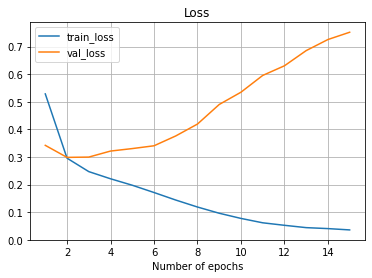

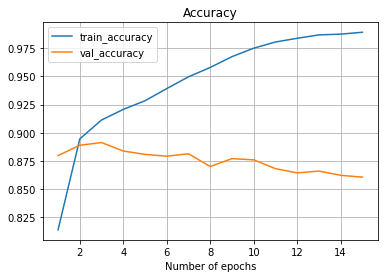

In [ ]:
plot_history(hist)

In [ ]:
from sklearn.metrics import classification_report 

y_test_pred = model.predict(x_test_oneHot)
print(y_test_pred.shape)
y_test_pred = np.argmax(y_test_pred, axis=-1)
print(y_test_pred.shape)

print(classification_report(y_test, y_test_pred))

(3717, 3)
(3717,)
              precision    recall  f1-score   support

           0       0.36      0.28      0.32       230
           1       0.91      0.93      0.92      2867
           2       0.80      0.78      0.79       620

    accuracy                           0.86      3717
   macro avg       0.69      0.66      0.67      3717
weighted avg       0.86      0.86      0.86      3717



## IMPROVING THE MODEL
Reducing overfitting

In [ ]:
from keras import regularizers  # Import the regularizers

In [ ]:
xin = Input(shape=(n_words,))

x = Dense(units=64, activation='relu')(xin)
x = Dropout(0.2)(x)

x = Dense(units=64, activation='relu')(x)
x = Dropout(0.2)(x)

res = Dense(units=3)(x)

model = Model(xin, res)

In [ ]:
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_42 (InputLayer)       [(None, 500)]             0         
                                                                 
 dense_148 (Dense)           (None, 64)                32064     
                                                                 
 dropout_61 (Dropout)        (None, 64)                0         
                                                                 
 dense_149 (Dense)           (None, 64)                4160      
                                                                 
 dropout_62 (Dropout)        (None, 64)                0         
                                                                 
 dense_150 (Dense)           (None, 3)                 195       
                                                                 
Total params: 36,419
Trainable params: 36,419
Non-trainabl

Epoch 1/10
136/136 [==============================] - 1s 4ms/step - loss: 0.6028 - accuracy: 0.7779 - val_loss: 0.3796 - val_accuracy: 0.8690
Epoch 2/10
136/136 [==============================] - 1s 4ms/step - loss: 0.3426 - accuracy: 0.8795 - val_loss: 0.3131 - val_accuracy: 0.8884
Epoch 3/10
136/136 [==============================] - 1s 4ms/step - loss: 0.2871 - accuracy: 0.8981 - val_loss: 0.2968 - val_accuracy: 0.8905
Epoch 4/10
136/136 [==============================] - 1s 4ms/step - loss: 0.2621 - accuracy: 0.9076 - val_loss: 0.2950 - val_accuracy: 0.8911
Epoch 5/10
136/136 [==============================] - 1s 4ms/step - loss: 0.2390 - accuracy: 0.9147 - val_loss: 0.2963 - val_accuracy: 0.8935
Epoch 6/10
136/136 [==============================] - 1s 4ms/step - loss: 0.2229 - accuracy: 0.9207 - val_loss: 0.3064 - val_accuracy: 0.8889
Epoch 7/10
136/136 [==============================] - 0s 4ms/step - loss: 0.2068 - accuracy: 0.9281 - val_loss: 0.3164 - val_accuracy: 0.8900
Epoch 

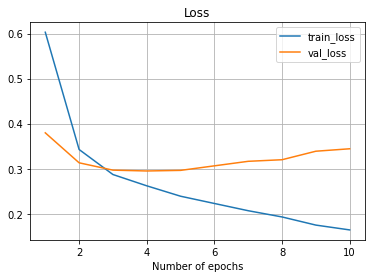

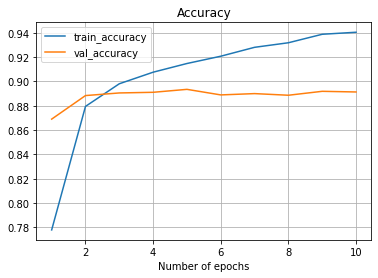

In [ ]:
hist = model.fit(x_train_oneHot, y_train, batch_size=128, epochs=10, validation_data=[x_val_oneHot, y_val])#, callbacks=[early_stop_callback])
plot_history(hist)

y_test_pred = model.predict(x_test_oneHot)
y_test_pred = np.argmax(y_test_pred, axis=-1)
print(classification_report(y_test, y_test_pred))

In [ ]:
model.save_weights('dense1_70.h5')

## BAG OF WORDS WITH MULTEPLICITY

In [305]:
# train

x_train_oneHot_mul = np.zeros((x_train.shape[0], n_words))

for i,l in enumerate(x_train_words):
  for w in l:
    try:
      x_train_oneHot_mul[i, word2index[w]] += 1.0
    except KeyError:
      misses_number += 1

x_train_oneHot_mul.shape

Misses: 0


(17348, 500)

In [306]:
# test

x_test_oneHot_mul = np.zeros((x_test.shape[0], n_words))

for i,l in enumerate(x_test_words):
  for w in l:
    try:
      x_test_oneHot_mul[i, word2index[w]] += 1.0
    except KeyError:
      misses_number += 1

x_test_oneHot_mul.shape

Misses: 0


(3717, 500)

In [307]:
# val

x_val_oneHot_mul = np.zeros((x_val.shape[0], n_words))

for i,l in enumerate(x_val_words):
  for w in l:
    try:
      x_val_oneHot_mul[i, word2index[w]] += 1.0
    except KeyError:
      misses_number += 1

x_val_oneHot_mul.shape

Misses: 0


(3718, 500)

### MODEL

In [291]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model

In [292]:
xin = Input(shape=(n_words,))

x = Dense(units=64, activation='relu')(xin)

x = Dense(units=64, activation='relu')(x)

x = Dense(units=64, activation='relu')(x)

res = Dense(units=3)(x)

model = Model(xin, res)

In [293]:
model.summary()

Model: "model_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_49 (InputLayer)       [(None, 500)]             0         
                                                                 
 dense_169 (Dense)           (None, 64)                32064     
                                                                 
 dense_170 (Dense)           (None, 64)                4160      
                                                                 
 dense_171 (Dense)           (None, 64)                4160      
                                                                 
 dense_172 (Dense)           (None, 3)                 195       
                                                                 
Total params: 40,579
Trainable params: 40,579
Non-trainable params: 0
_________________________________________________________________


In [294]:
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [295]:
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [296]:
hist = model.fit(x_train_oneHot_mul, y_train, batch_size=128, epochs=15, validation_data=[x_val_oneHot_mul, y_val])

Epoch 1/15
136/136 [==============================] - 2s 11ms/step - loss: 0.5357 - accuracy: 0.8043 - val_loss: 0.3688 - val_accuracy: 0.8712
Epoch 2/15
136/136 [==============================] - 1s 4ms/step - loss: 0.3137 - accuracy: 0.8920 - val_loss: 0.3088 - val_accuracy: 0.8884
Epoch 3/15
136/136 [==============================] - 0s 3ms/step - loss: 0.2531 - accuracy: 0.9115 - val_loss: 0.3096 - val_accuracy: 0.8892
Epoch 4/15
136/136 [==============================] - 0s 3ms/step - loss: 0.2245 - accuracy: 0.9201 - val_loss: 0.3116 - val_accuracy: 0.8878
Epoch 5/15
136/136 [==============================] - 0s 3ms/step - loss: 0.1975 - accuracy: 0.9305 - val_loss: 0.3285 - val_accuracy: 0.8854
Epoch 6/15
136/136 [==============================] - 0s 3ms/step - loss: 0.1695 - accuracy: 0.9401 - val_loss: 0.3610 - val_accuracy: 0.8787
Epoch 7/15
136/136 [==============================] - 0s 3ms/step - loss: 0.1428 - accuracy: 0.9502 - val_loss: 0.4210 - val_accuracy: 0.8774
Epoch

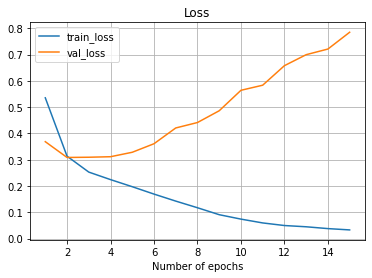

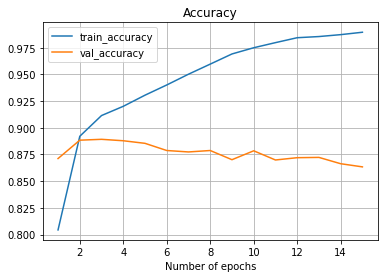

In [297]:
plot_history(hist)

In [298]:
y_test_pred = model.predict(x_test_oneHot_mul)
print(y_test_pred.shape)
y_test_pred = np.argmax(y_test_pred, axis=-1)
print(y_test_pred.shape)

print(classification_report(y_test, y_test_pred))

(3717, 3)
(3717,)
              precision    recall  f1-score   support

           0       0.33      0.30      0.31       230
           1       0.92      0.91      0.92      2867
           2       0.75      0.81      0.78       620

    accuracy                           0.86      3717
   macro avg       0.67      0.67      0.67      3717
weighted avg       0.86      0.86      0.86      3717



## IMPROVING THE MODEL
Reducing overfitting

In [299]:
xin = Input(shape=(n_words,))

x = Dense(units=64, activation='relu')(xin)
x = Dropout(0.2)(x)

x = Dense(units=64, activation='relu')(x)
x = Dropout(0.2)(x)

res = Dense(units=3)(x)

model = Model(xin, res)

In [300]:
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [301]:
model.summary()

Model: "model_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_50 (InputLayer)       [(None, 500)]             0         
                                                                 
 dense_173 (Dense)           (None, 64)                32064     
                                                                 
 dropout_75 (Dropout)        (None, 64)                0         
                                                                 
 dense_174 (Dense)           (None, 64)                4160      
                                                                 
 dropout_76 (Dropout)        (None, 64)                0         
                                                                 
 dense_175 (Dense)           (None, 3)                 195       
                                                                 
Total params: 36,419
Trainable params: 36,419
Non-trainabl

Epoch 1/10
136/136 [==============================] - 1s 6ms/step - loss: 0.5899 - accuracy: 0.7841 - val_loss: 0.3809 - val_accuracy: 0.8669
Epoch 2/10
136/136 [==============================] - 1s 6ms/step - loss: 0.3500 - accuracy: 0.8775 - val_loss: 0.3134 - val_accuracy: 0.8843
Epoch 3/10
136/136 [==============================] - 1s 9ms/step - loss: 0.2909 - accuracy: 0.8958 - val_loss: 0.3001 - val_accuracy: 0.8889
Epoch 4/10
136/136 [==============================] - 1s 7ms/step - loss: 0.2674 - accuracy: 0.9067 - val_loss: 0.2981 - val_accuracy: 0.8919
Epoch 5/10
136/136 [==============================] - 1s 11ms/step - loss: 0.2503 - accuracy: 0.9125 - val_loss: 0.3003 - val_accuracy: 0.8930
Epoch 6/10
136/136 [==============================] - 1s 8ms/step - loss: 0.2293 - accuracy: 0.9207 - val_loss: 0.3073 - val_accuracy: 0.8916
Epoch 7/10
136/136 [==============================] - 1s 4ms/step - loss: 0.2196 - accuracy: 0.9257 - val_loss: 0.3072 - val_accuracy: 0.8916
Epoch

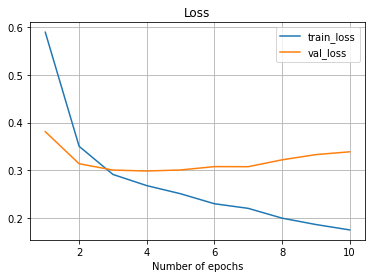

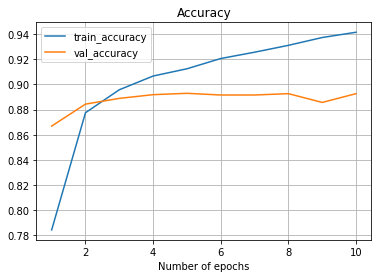

In [302]:
hist = model.fit(x_train_oneHot_mul, y_train, batch_size=128, epochs=10, validation_data=[x_val_oneHot, y_val])#, callbacks=[early_stop_callback])
plot_history(hist)

y_test_pred = model.predict(x_test_oneHot_mul)
y_test_pred = np.argmax(y_test_pred, axis=-1)
print(classification_report(y_test, y_test_pred))